# **Data Visualization using Pandas and Matplotlib**


# Supplementary Activity

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

Create a histogram and KDE of the change from open to close in the price of Facebook stock.

Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.

Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

The second subplot will be a bar plot showing the net effect this had monthly, using resample().

Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col= 'date', parse_dates=True)
fb

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002
2018-12-26,126.00,134.24,125.8900,134.18,39723370
2018-12-27,132.44,134.99,129.6700,134.52,31202509


1. Plotting the 20 Day minimum of the closing price of Facebook

In [3]:
closeRoll = fb['close'].rolling(window=20).min()

<Axes: title={'center': 'Plot for rolling 20-Day minimum of the closing price of Facebook'}, xlabel='date', ylabel='closing'>

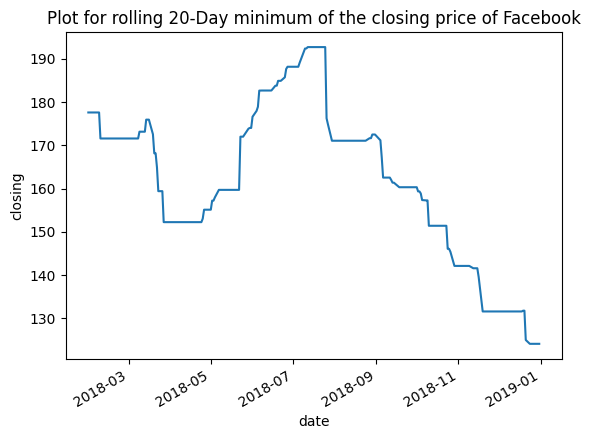

In [4]:
closeRoll.plot(y= 'close',title= 'Plot for rolling 20-Day minimum of the closing price of Facebook', xlabel='date', ylabel= 'closing')


2. Create a histogram and a KDE of the change from open to close in the price of facebook price

In [55]:
fb['priceChange'] = fb['close'] - fb['open'] #Calculate the price Change and place it in price change cols
fb.drop(columns='Price Change', inplace=True)
fb

,open,high,low,close,volume,priceChange
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,3.74
2018-01-03,181.88,184.78,181.3300,184.67,16886563,2.79
2018-01-04,184.90,186.21,184.0996,184.33,13880896,-0.57
2018-01-05,185.59,186.90,184.9300,186.85,13574535,1.26
2018-01-08,187.20,188.90,186.3300,188.28,17994726,1.08
...,...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002,0.96
2018-12-26,126.00,134.24,125.8900,134.18,39723370,8.18
2018-12-27,132.44,134.99,129.6700,134.52,31202509,2.08


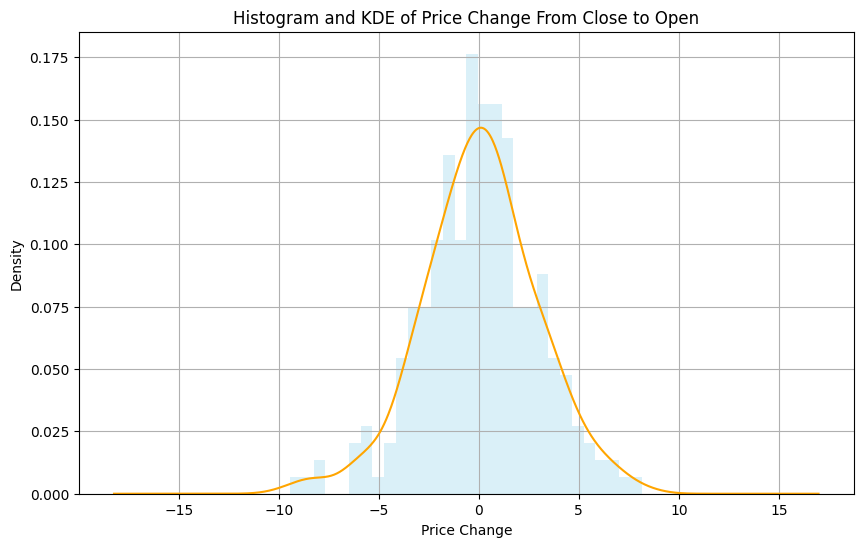

In [70]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
ax.hist(fb['priceChange'], bins=30, density=True, alpha=0.3, color='skyblue')


fb['priceChange'].plot(kind='kde', ax=ax, color='orange') #Creating the KDE plot


ax.set_title('Histogram and KDE of Price Change From Close to Open') #Title
ax.set_xlabel('Price Change')

plt.grid()

3. Create box plots for the magnitudes of each type of magType used in indonesia

In [99]:
#Find the earthquakes data

eq = pd.read_csv('earthquakes-1.csv')

indoeq  = eq.query('parsed_place == "Indonesia"') #Filter out all the indo place
indoeq



,mag,magType,time,place,tsunami,parsed_place
9,4.7,mb,1539472814760,"219km SSE of Saparua, Indonesia",0,Indonesia
13,4.5,mb,1539470898340,"120km SSW of Banda Aceh, Indonesia",0,Indonesia
180,5.2,mww,1539405255580,"25km E of Bitung, Indonesia",0,Indonesia
421,4.7,mb,1539331098920,"38km SSW of Nggongi Satu, Indonesia",0,Indonesia
660,4.4,mb,1539258833830,"51km WSW of Kasiguncu, Indonesia",0,Indonesia
...,...,...,...,...,...,...
9041,4.3,mb,1537296305750,"7km WSW of Karangsubagan, Indonesia",0,Indonesia
9075,4.4,mb,1537288723310,"103km W of Kuripan, Indonesia",0,Indonesia
9108,4.0,mb,1537280181100,"123km NE of Bitung, Indonesia",0,Indonesia
9209,4.7,mb,1537256021950,"18km NE of Reuleuet, Indonesia",0,Indonesia


<Axes: >

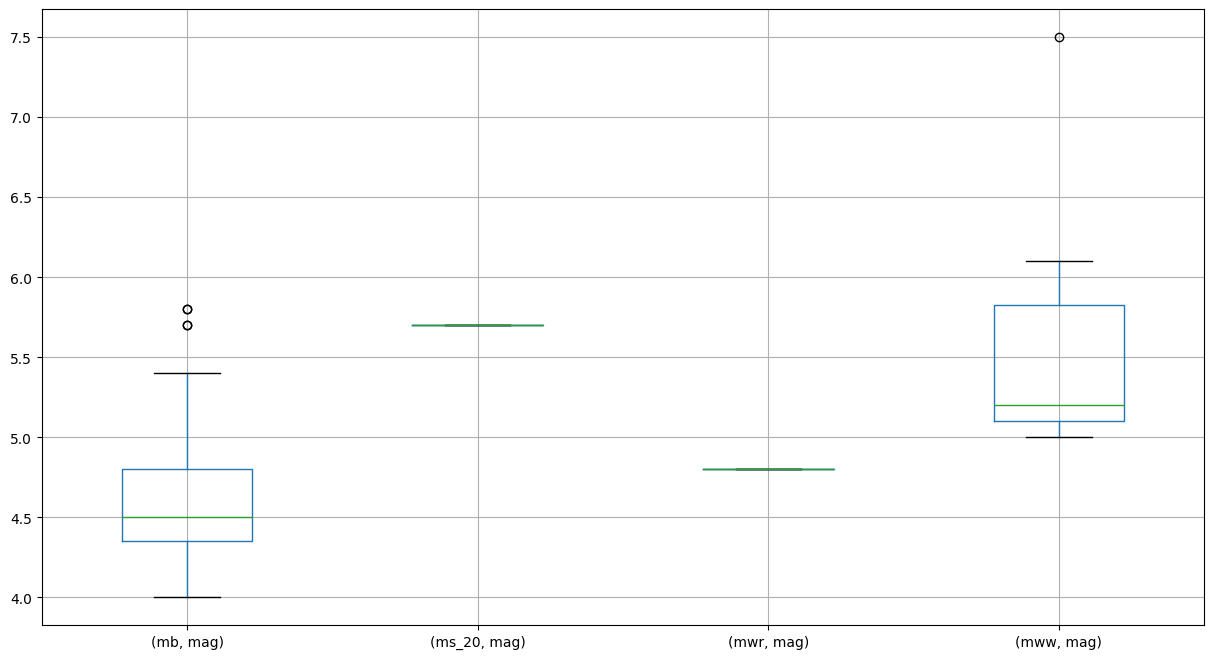

In [126]:
#Ploting the box plots
indoeq[['mag', 'magType']].groupby('magType').boxplot(figsize=(15,8), subplots=False)

In [136]:
fb['low']

date
2018-01-02    177.5500
2018-01-03    181.3300
2018-01-04    184.0996
2018-01-05    184.9300
2018-01-08    186.3300
                ...   
2018-12-24    123.0200
2018-12-26    125.8900
2018-12-27    129.6700
2018-12-28    132.2000
2018-12-31    129.9500
Name: low, Length: 251, dtype: float64

In [137]:
weeklyMax = fb['high'].resample('W').max()



In [140]:
weeklyLow = fb['low'].resample('W').min()

#Get their difference

priceDiff = weeklyMax - weeklyLow

Text(0, 0.5, 'Price Difference')

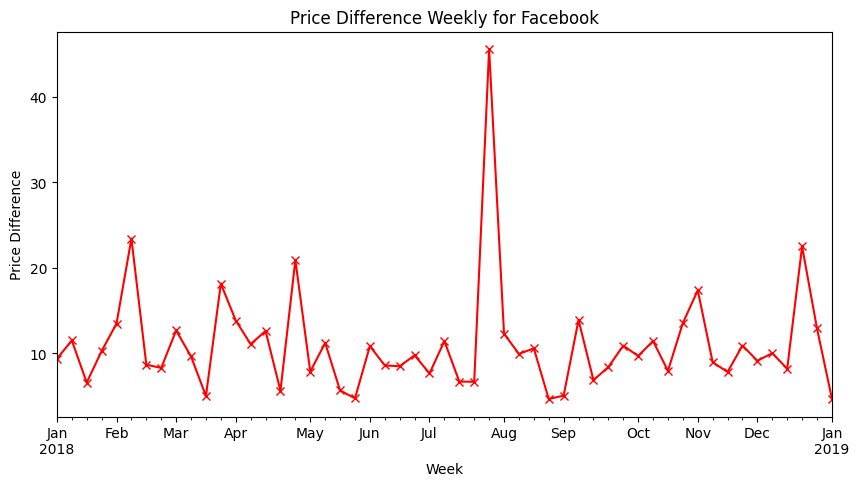

In [144]:
#Creating the plots
fig = plt.figure(figsize = (10, 5))

priceDiff.plot(color = 'red', marker= 'x')
plt.title('Price Difference Weekly for Facebook')
plt.xlabel('Week')
plt.ylabel('Price Difference')


In [162]:
#Using the shift(1) to calculate the previous closing price minus the current opening price

priceDiff = fb['open'] - fb['close'].shift(1)


Text(0.5, 0, 'Date')

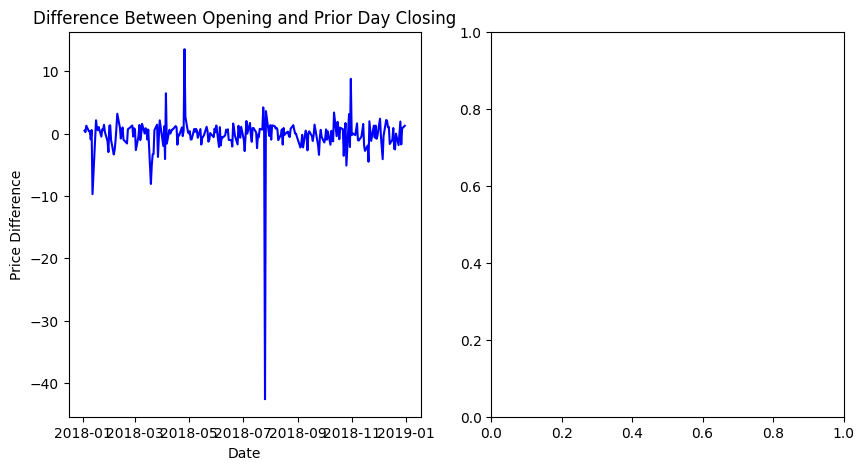

In [163]:
#Create subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5)) #Creating the figure and two axes

ax1.plot(priceDiff.index, priceDiff, color = 'blue')
ax1.set_title('Difference Between Opening and Prior Day Closing')
ax1.set_ylabel('Price Difference')
ax1.set_xlabel('Date')


#For ax2 using a bar graph and resample() to months
monthlyNetEffect = fb.resample('M').apply(lambda x : x['high'].max() - x['low'].min())
# colors = []

# # for val in monthlyNetEffect:
# #     if val >= 0:
# #         colors.append('green')
# #     else:
# #         colors.append('red')
colors = ['green' if val >= 0 else 'red' for val in monthlyNetEffect]




# **Conclusions and Summary**

It was hard. But as a takeaway, I did learn some functions from both pandas, matplotlib and seaborn. Functions like assign(), query(), subplots() and many more are now a bit familiar however I still feel like I need more practice and familiarization with regards to the aforementioned functions.